# Visualising Popular Questions

Before I embark on analyzing anything from this dataset, it is always good to have some preliminary visualisations so that we know what kind of beast we are dealing with

# Loading the dataset

As usual, I load the data set using `pandas`.

In [4]:
import pandas as pd

ORIGINAL_DATASET = "../data/python_questions_new.csv"

data = pd.read_csv(ORIGINAL_DATASET, encoding='latin1')

In [5]:
data.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,Number of Answers,Tags,full_text,is_code_present
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,4.0,"['python', 'osx', 'fonts', 'photoshop']",I am using the Photoshop's javascript API to f...,0
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,3.0,"['python', 'windows', 'image', 'pdf']",I have a cross-platform (Python) application w...,0
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,7.0,"['python', 'continuous-integration', 'extreme-...",I'm starting work on a hobby project with a py...,0
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,3.0,"['python', 'sql', 'database', 'oracle', 'cx-or...",There are several ways to iterate over a resul...,0
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,8.0,"['python', 'arrays', 'iteration']",I don't remember whether I was dreaming or not...,1


Next, I change the creation date type from `String` to `datetime`

In [6]:
data['CreationDate'] = pd.to_datetime(data['CreationDate'], format="%Y-%m-%dT%H:%M:%SZ")

# Visualisation Time

I will use seaborn and wordcloud to help me see what the trending questions for each year were

In [7]:
%matplotlib inline
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

Next, I define a function `find_year` to simply extract the creation year of each post

In [8]:
def find_year(date):
    return date.year

In [9]:
data['year'] = data['CreationDate'].apply(find_year)

# Setting up the parameter

I will be using `CountVectorizer` to find the frequency of each word (or in a more appropriate term, token). For the parameters, I set the 4 most important one:
- min_df: Minimum number of occurence of a token to be qualified into the vector
- max_df: Maximum percentage of occurence of a token to be qualified. A token that appear larger than this threshold will be ignored
- stop_words: Simply a bunch of words that carry little meaning and can be considered noises.
- ngram_range: Range of length of the token. In this case, each input will be tokenised into token of length 2 to 3 words

In [11]:
# Converting the body to String 
data['full_text'] = data['full_text'].apply(str)

# Popular Phrases 2016

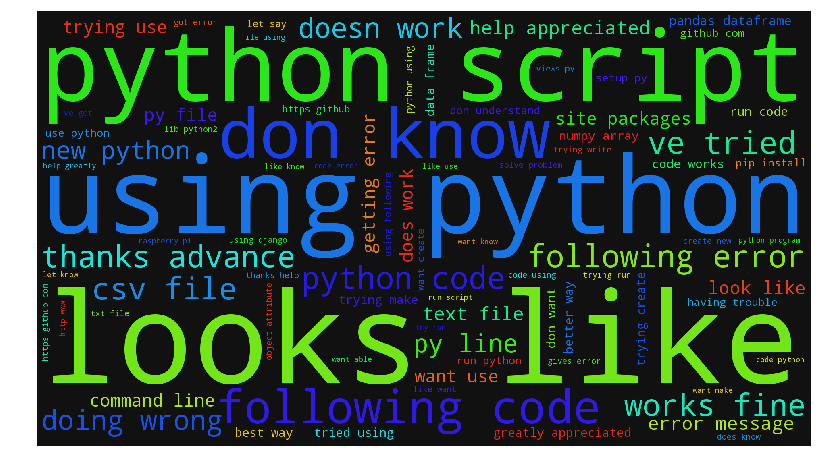

In [12]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words='english', ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2016]

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

# Popular Phrases 2015

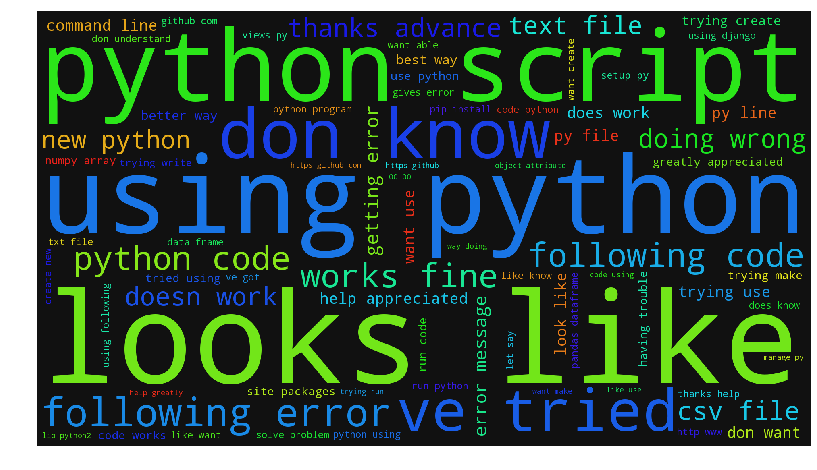

In [13]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words='english', ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2015]

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Popular Phrases 2014

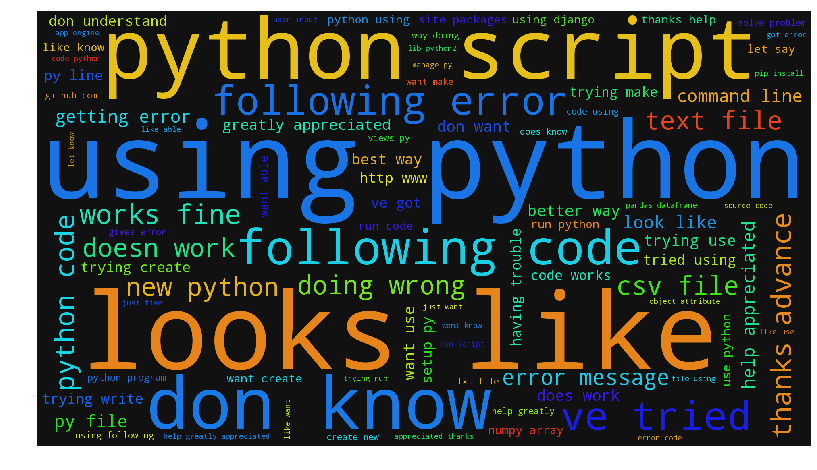

In [14]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words='english', ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2014]

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Popular Phrases 2013

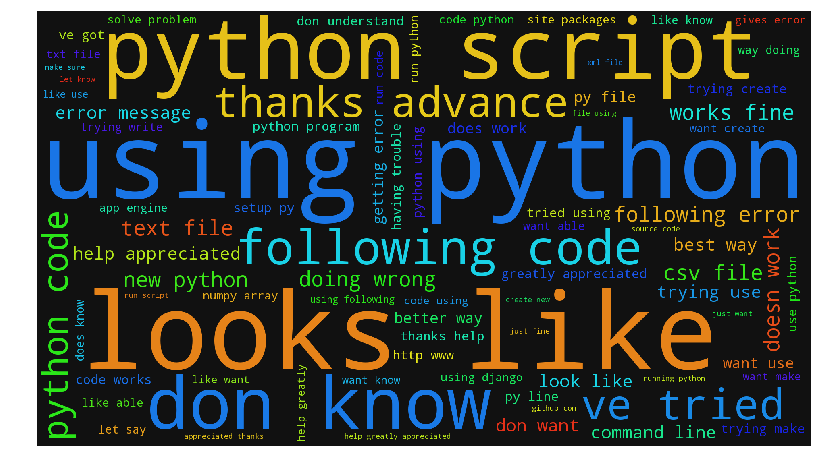

In [15]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words='english', ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2013]

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Popular Phrases 2012

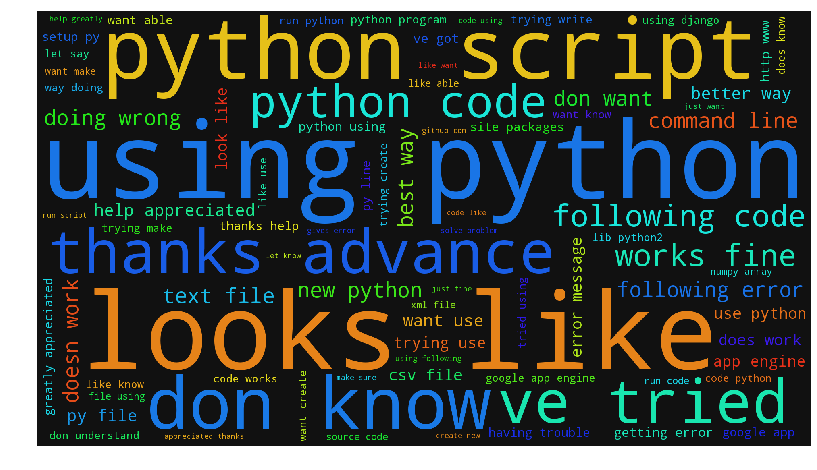

In [16]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words='english', ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2012]

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Popular Phrases 2011

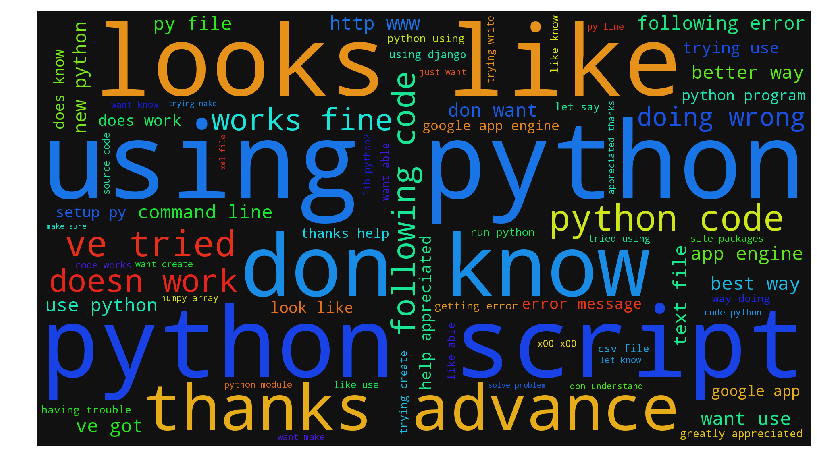

In [17]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words='english', ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2011]

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Popular Phrases 2010

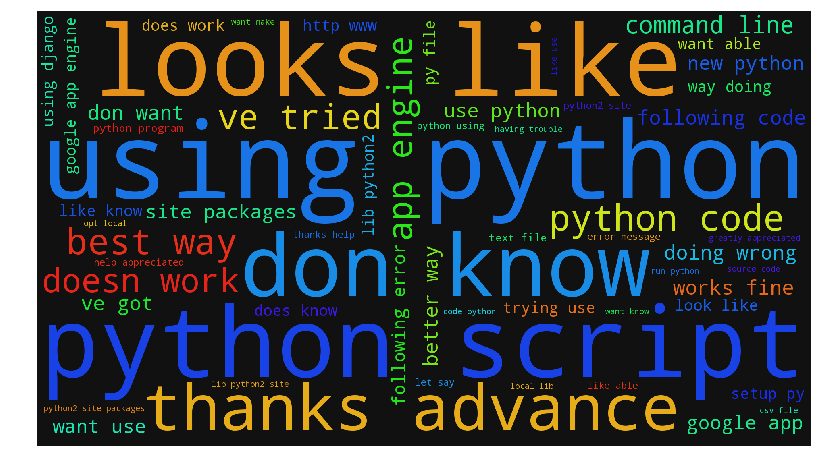

In [18]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words='english', ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2010]

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Popular Phrases 2009

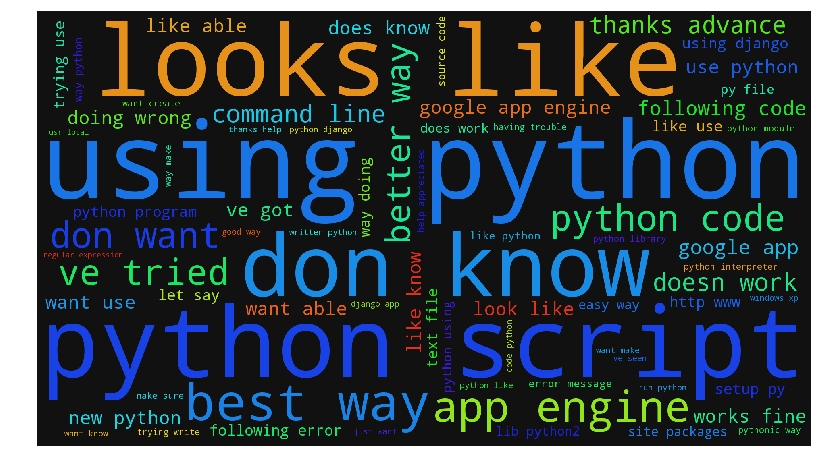

In [19]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words='english', ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2009]

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

# Popular Phrases 2008

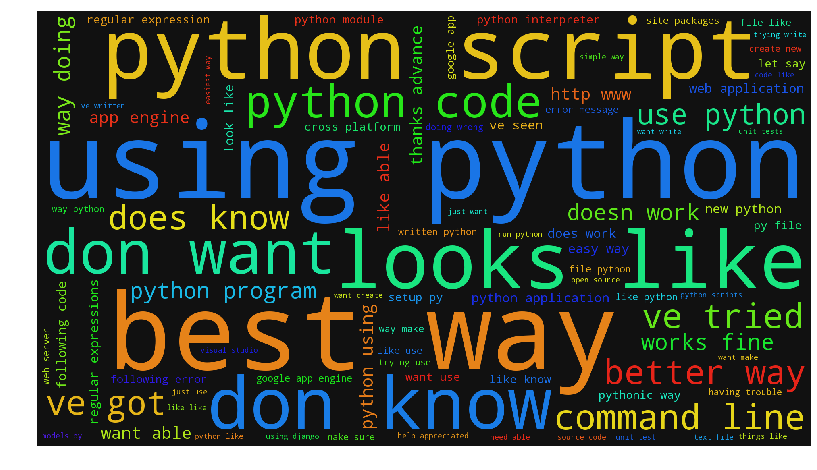

In [20]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words='english', ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2008]

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) )
sns.plt.axis("off")
sns.plt.imshow(wc)

As we can see there is nothing much to see from these visualisations. I guess we need to do something else to deal with this set of data. My best bet is to define a new set of stop words which will be carried out in the next section